In [9]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [8]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/294.9 kB ? eta -:--:--
     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
df = pd.read_csv(r'C:\Users\rishi\OneDrive\Desktop\Second Year Civil\4th Sem\dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
df.drop('id', axis=1, inplace=True)
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(column)
    print(df[column].unique())
    print('\n')

gender
['Male' 'Female' 'Other']


ever_married
['Yes' 'No']


work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Residence_type
['Urban' 'Rural']


smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




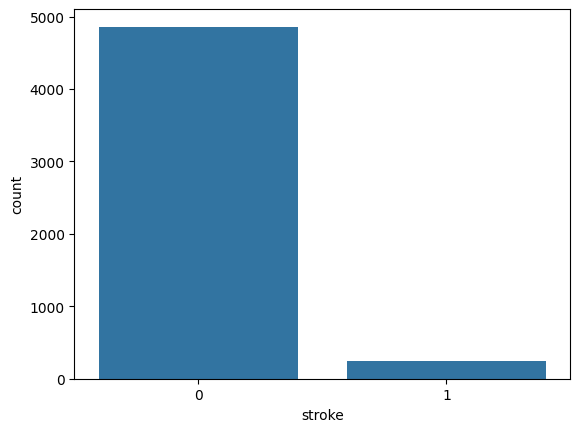

In [65]:
sns.countplot(data=df, x='stroke')
plt.show()

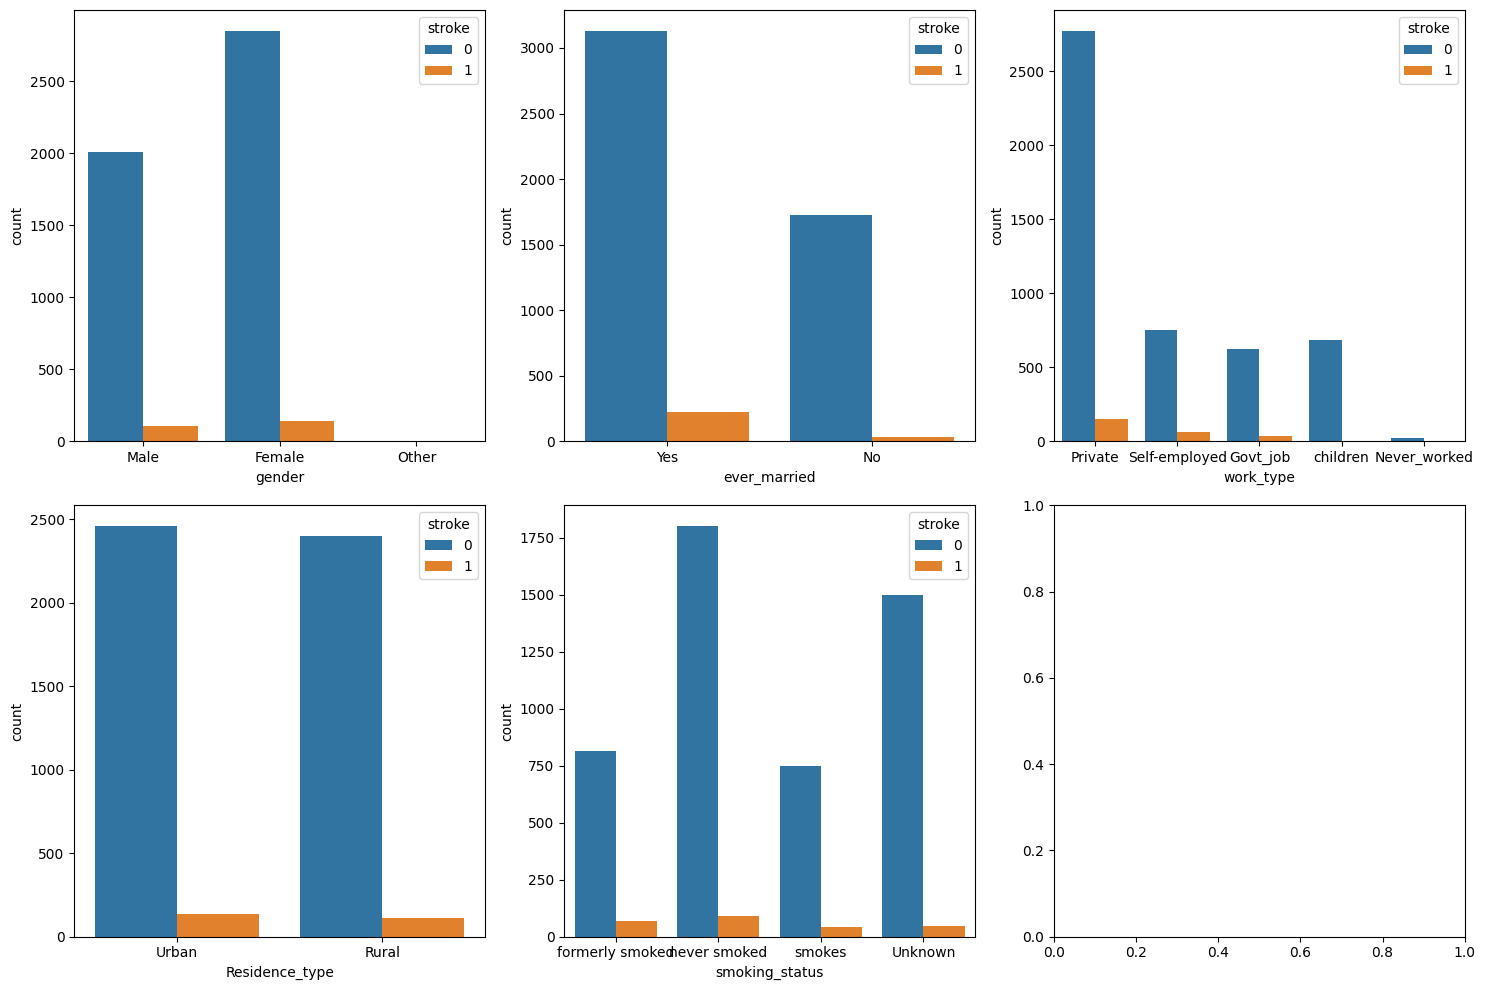

In [23]:
gender_Encoding = {'Male' : 0, 'Female': 1, 'Other': 2}

df['gender_encoded'] = df['gender'].map(gender_Encoding)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))


# sns.countplot(data=df, x='stroke', ax=axes[0, 0])
sns.countplot(data=df, x='gender', hue = 'stroke', ax=axes[0, 0])
sns.countplot(data=df, x='ever_married',hue = 'stroke', ax=axes[0, 1])
sns.countplot(data=df, x='work_type',hue = 'stroke', ax=axes[0, 2])
sns.countplot(data=df, x='Residence_type',hue = 'stroke', ax=axes[1, 0])
sns.countplot(data=df, x='smoking_status',hue = 'stroke', ax=axes[1, 1])

plt.tight_layout()

plt.show()


### Since the Numbr of Stroke patients in 'Other' Gender, and 'Never Worked' and 'Children' work_type is neglible almost zero we'll drop them

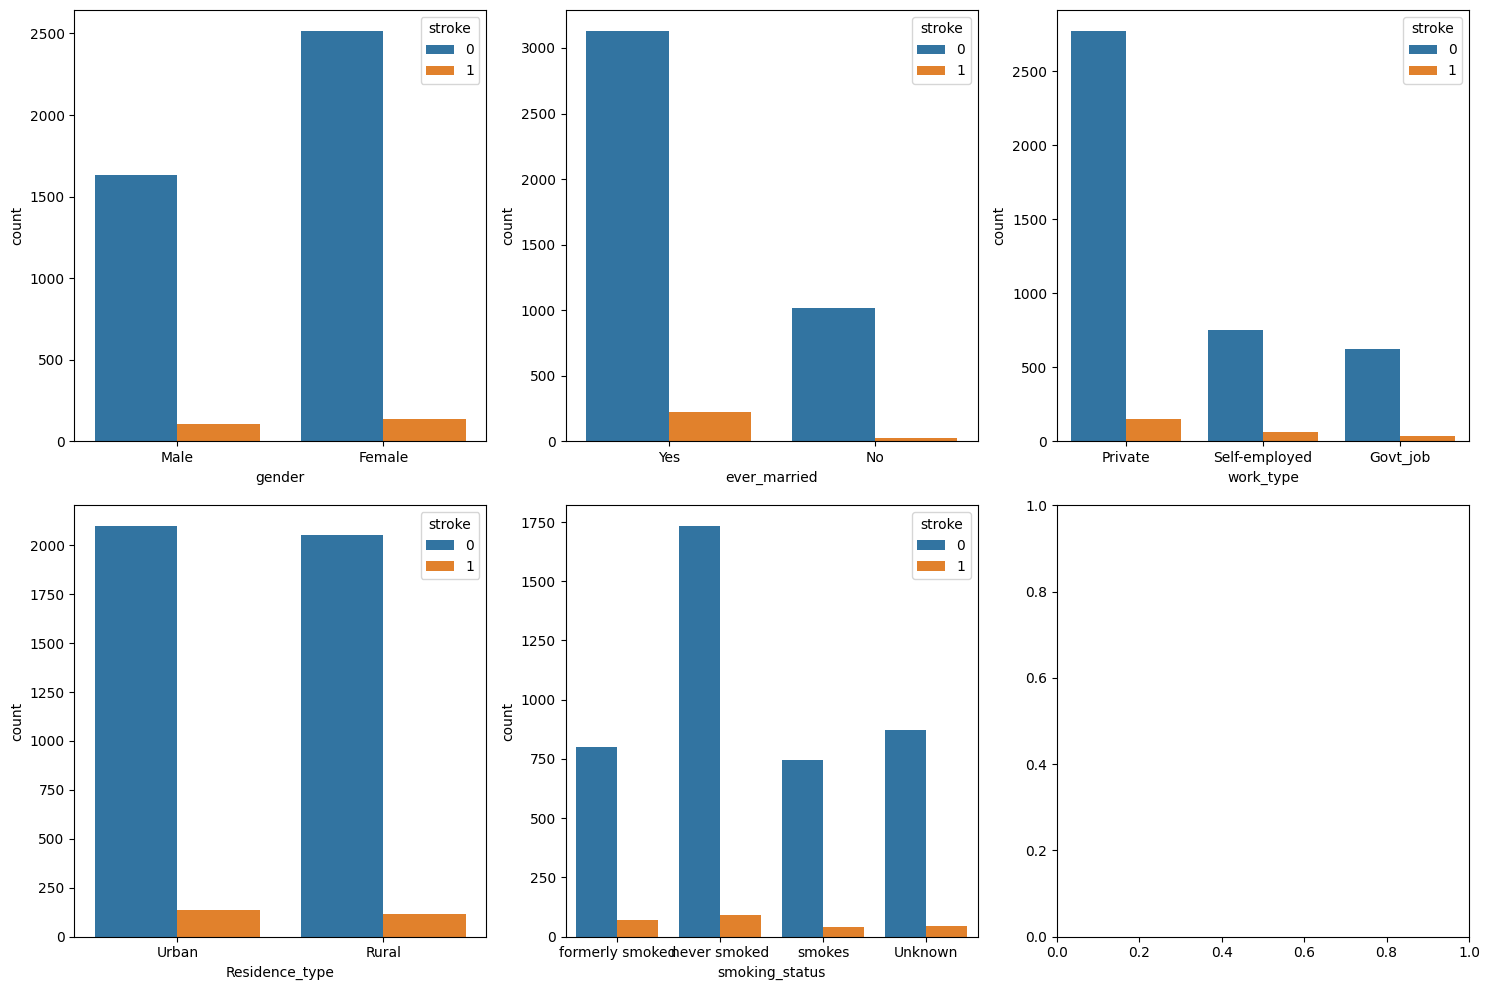

In [24]:
df = df[(df['gender'] != 'Other') & (df['work_type'] != 'children') & (df['work_type'] != 'Never_worked')]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


# sns.countplot(data=df, x='stroke', ax=axes[0, 0])
sns.countplot(data=df, x='gender', hue = 'stroke', ax=axes[0, 0])
sns.countplot(data=df, x='ever_married',hue = 'stroke', ax=axes[0, 1])
sns.countplot(data=df, x='work_type',hue = 'stroke', ax=axes[0, 2])
sns.countplot(data=df, x='Residence_type',hue = 'stroke', ax=axes[1, 0])
sns.countplot(data=df, x='smoking_status',hue = 'stroke', ax=axes[1, 1])

plt.tight_layout()

plt.show()

In [25]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(column)
    print(df[column].unique())
    print('\n')

gender
['Male' 'Female']


ever_married
['Yes' 'No']


work_type
['Private' 'Self-employed' 'Govt_job']


Residence_type
['Urban' 'Rural']


smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




In [26]:
# encoding

gender_encoding = {'Male' : 0, 'Female': 1}
ever_married_encoding = {'Yes': 1, 'No': 0}
work_type_encodong = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2}
Residence_type_encoding = {'Urban': 1, 'Rural': 0}
smoking_status_encoding = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}

df['gender_encoded'] = df['gender'].map(gender_encoding)
df['ever_married_encoded'] = df['ever_married'].map(ever_married_encoding)
df['work_type_encoded'] = df['work_type'].map(work_type_encodong)
df['Residence_type_encoded'] = df['Residence_type'].map(Residence_type_encoding)
df['smoking_status_encoded'] = df['smoking_status'].map(smoking_status_encoding)

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0,1,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,1,1,0,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0,0,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,1,0,1,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,1,0,1,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,1,1,1,1
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1,1,1,0,1
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,1,0,0,0


In [28]:
df.dtypes

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
dtype: object

In [29]:
new_df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded', 'smoking_status_encoded', 'stroke']]
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,stroke
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1
1,61.0,0,0,202.21,NaN,1,1,1,0,1,1
2,80.0,0,1,105.92,32.5,0,1,0,0,1,1
3,49.0,0,0,171.23,34.4,1,1,0,1,2,1
4,79.0,1,0,174.12,24.0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,1,0,1,1,0
5106,81.0,0,0,125.20,40.0,1,1,1,1,1,0
5107,35.0,0,0,82.99,30.6,1,1,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,0,0


In [30]:
new_df = new_df.dropna()
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,stroke
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,1,1
3,49.0,0,0,171.23,34.4,1,1,0,1,2,1
4,79.0,1,0,174.12,24.0,1,1,1,0,1,1
5,81.0,0,0,186.21,29.0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,18.0,0,0,82.85,46.9,1,0,0,1,3,0
5106,81.0,0,0,125.20,40.0,1,1,1,1,1,0
5107,35.0,0,0,82.99,30.6,1,1,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,0,0


<Axes: >

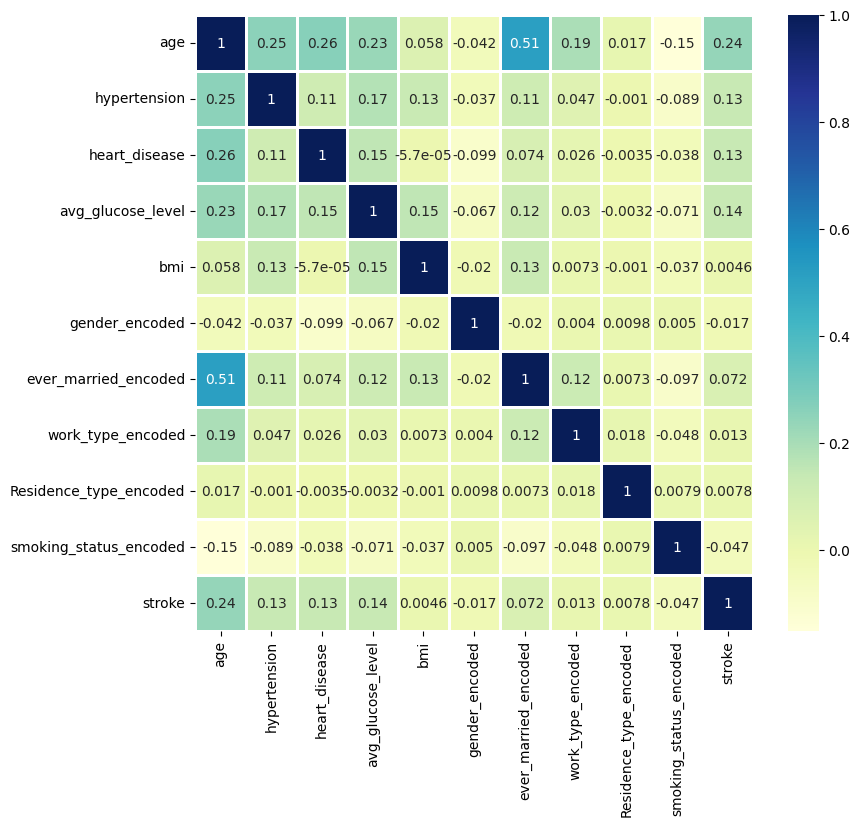

In [31]:
corrmat = new_df.corr()
f,ax = plt.subplots(figsize = (9,8))
sns.heatmap(corrmat, ax = ax ,cmap = "YlGnBu", linewidths = 0.8, annot = True)

In [33]:
X = new_df.drop('stroke', axis =1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,67.0,0,1,228.69,36.6,0,1,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,1,0,1,2
4,79.0,1,0,174.12,24.0,1,1,1,0,1
5,81.0,0,0,186.21,29.0,0,1,0,1,0


In [78]:
# Training a K Nearest Neighbours Classifier Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Assuming you have already defined new_df as your feature matrix and 'stroke' as your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, new_df['stroke'], test_size=0.2, random_state=42)




print("x_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", X_test.shape)
print("y_test : ", y_test.shape)

rf = KNeighborsClassifier()

rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Accuracy : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))


x_train :  (3372, 10)
y_train :  (3372,)
x_test :  (843, 10)
y_test :  (843,)
Accuracy :  92.52669039145907
ROC AUC Score :  0.4949238578680203


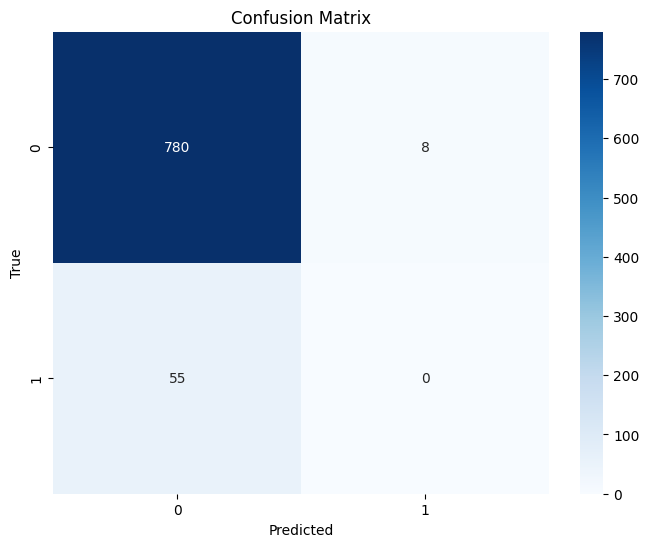

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [72]:
# Training a Random Forest Classifier Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Assuming you have already defined new_df as your feature matrix and 'stroke' as your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, new_df['stroke'], test_size=0.2, random_state=42)




print("x_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", X_test.shape)
print("y_test : ", y_test.shape)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Accuracy : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))


x_train :  (3372, 10)
y_train :  (3372,)
x_test :  (843, 10)
y_test :  (843,)
Accuracy :  93.23843416370107
ROC AUC Score :  0.4987309644670051


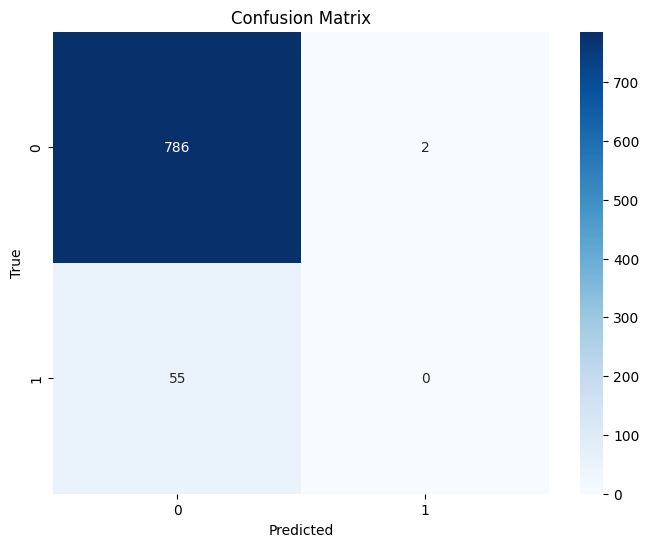

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
!pip install imbalanced-learn
import imblearn

In [79]:
# Using Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Perform random undersampling
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled contain the randomly undersampled data

print(X_under.shape)
print(y_under.shape)

(306, 10)
(306,)


In [83]:
rf1 = KNeighborsClassifier()

rf1.fit(X_under, y_under)


y_pred = rf1.predict(X_test)


print("Accuracy : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))

Accuracy :  70.34400948991696
ROC AUC Score :  0.7483502538071066


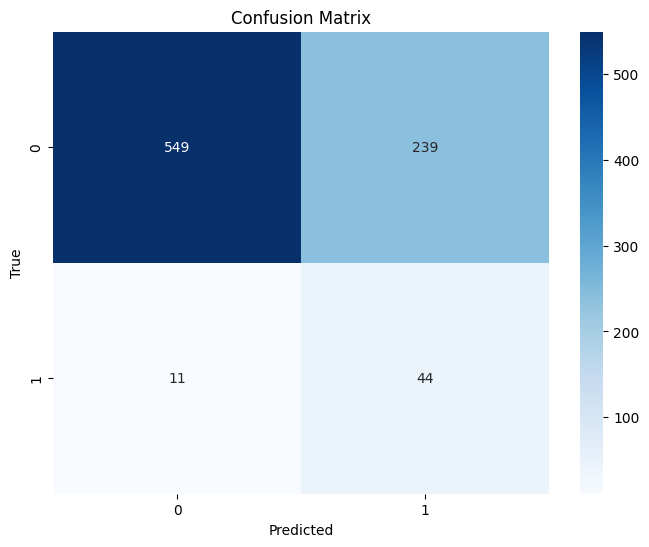

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [85]:
#Using Random Oversampling
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)

X_over, y_over = over_sampler.fit_resample(X_train, y_train)

In [95]:
rf2 = RandomForestClassifier()

rf2.fit(X_over, y_over)


y_pred = rf2.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))

Accuracy :  93.00118623962041
ROC AUC Score :  0.5059183202584216


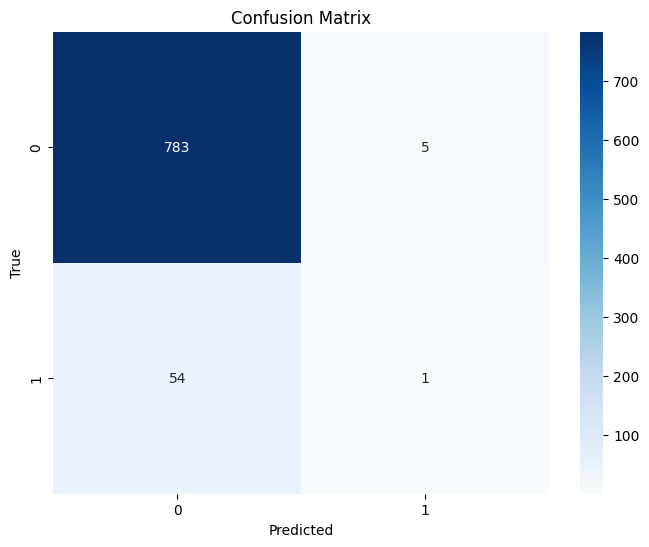

In [96]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [88]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(X_smote.shape)
print(y_smote.shape)

(6438, 10)
(6438,)


In [91]:
rf3 = KNeighborsClassifier()

rf3.fit(X_smote, y_smote)


y_pred = rf3.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred) * 100)
print("ROC AUC Score : ", roc_auc_score(y_test, y_pred))

Accuracy :  80.18979833926453
ROC AUC Score :  0.6318874019381633


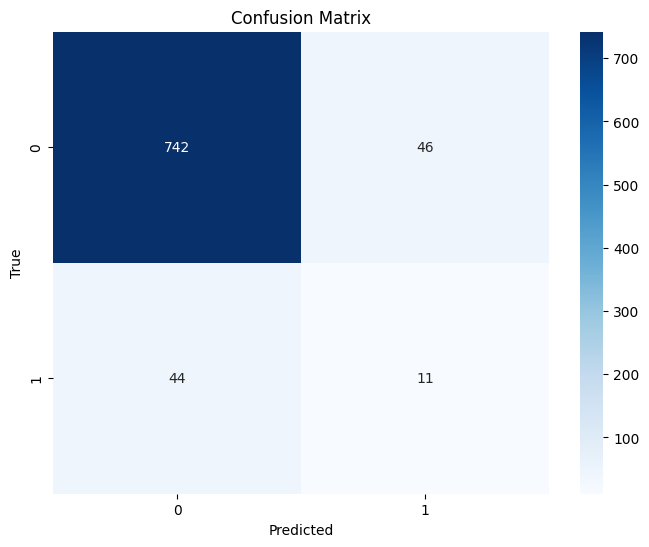

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()